In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# AMES HOUSING

### 1. Business & Data Understanding (Pemahaman Bisnis & Data)

#### - Tujuan
    Melakukan prediksi harga jual

#### - Sumber Data dan Format Data
Data berasal dari "https://www.kaggle.com/datasets/prevek18/ames-housing-dataset?resource=download" <br>Data memiliki format .csv

In [ ]:
data = pd.read_csv("AmesHousing.csv")
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
print('Jumlah column : ', data.shape[1])
print('Jumlah baris : ', data.shape[0])

Jumlah column :  82
Jumlah baris :  2930


In [4]:
# Melihat informasi data dan ada column apa saja
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

### Data Cleaning & Analysis

#### Data Cleaning

In [5]:
# Melihat data yang kosong

print('Jumlah data yang kolomnya ada yang kosong :',data.isnull().any().sum())
data.isnull().any()    #.astype(int)

Jumlah data yang kolomnya ada yang kosong : 27


Order             False
PID               False
MS SubClass       False
MS Zoning         False
Lot Frontage       True
                  ...  
Mo Sold           False
Yr Sold           False
Sale Type         False
Sale Condition    False
SalePrice         False
Length: 82, dtype: bool

In [6]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Area          1
Garage Cars          1
dtype: int64

In [7]:
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    data[col] = data[col].fillna(data[col].mean())

In [8]:
# Fill data kosong di kolom Alley (Gang/Lorong)
data['Alley'] = data['Alley'].fillna('No_Alley')

# Fill data kosong di kolom Mas Vnr Type (Jenis Dinding)
data['Mas Vnr Type'] = data['Mas Vnr Type'].fillna('No_Mas_Vnr')

# Fill data kosong di kolom Basement
columns_basement = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
for col in columns_basement:
    data[col] = data[col].fillna('No_Basement')

# Fill data kosong di kolom Fireplace Qu
data['Fireplace Qu'] = data['Fireplace Qu'].fillna('No_Fireplace')

# Fill data kosong di kolom Garasi
columns_garage = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
for col in columns_garage:
    data[col] = data[col].fillna('No_Garage')

# Fill data kosong di kolom Pool QC (Kolam Renang)
data['Pool QC'] = data['Pool QC'].fillna('No_Pool')

# Fill data kosong di kolom Fence (Pagar)
data['Fence'] = data['Fence'].fillna('No_Fence')

# Fill data kosong di kolom Misc Feature (Fitur Lainnya)
data['Misc Feature'] = data['Misc Feature'].fillna('No_Misc_Feature')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

#### Data Analysis

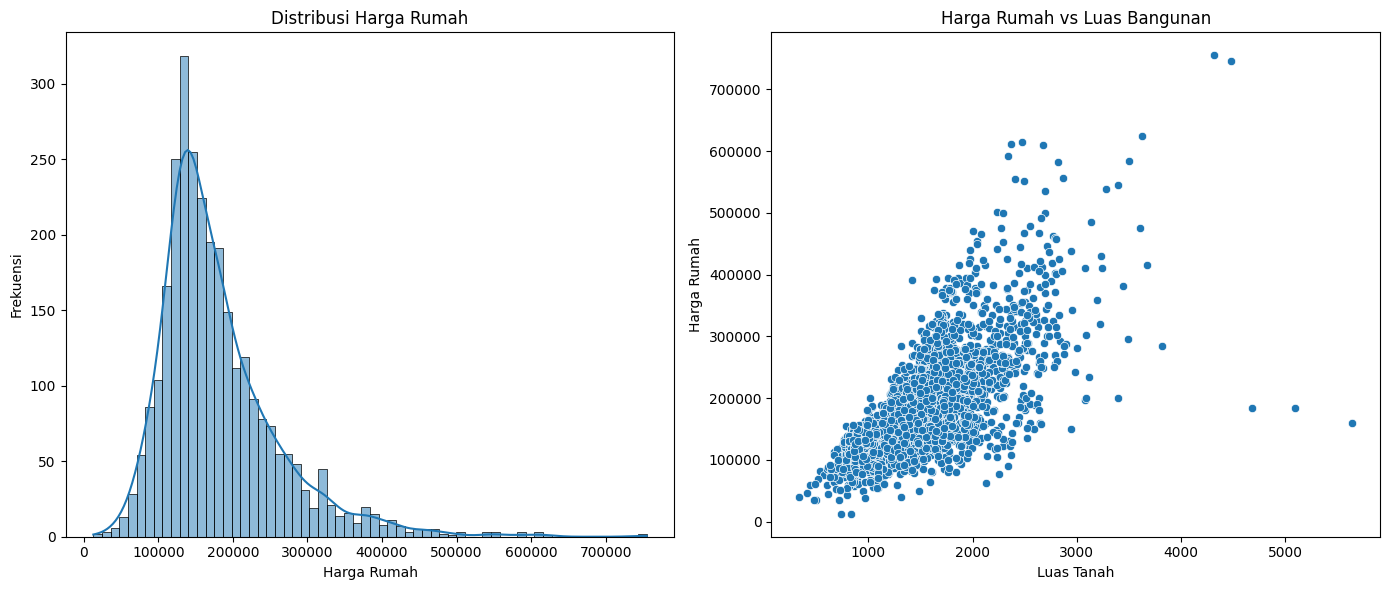

In [10]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=data, x='SalePrice', kde=True)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga Rumah')
plt.ylabel('Frekuensi')
# Sebaran harga rumah (apakah normal, skewed ke kiri/kanan, atau bimodal)

plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='Gr Liv Area', y='SalePrice')
plt.title('Harga Rumah vs Luas Bangunan')
plt.xlabel('Luas Tanah')
plt.ylabel('Harga Rumah')
# Kekuatan korelasi (semakin titik berkumpul membentuk garis, semakin kuat korelasi).

plt.tight_layout()
plt.show()

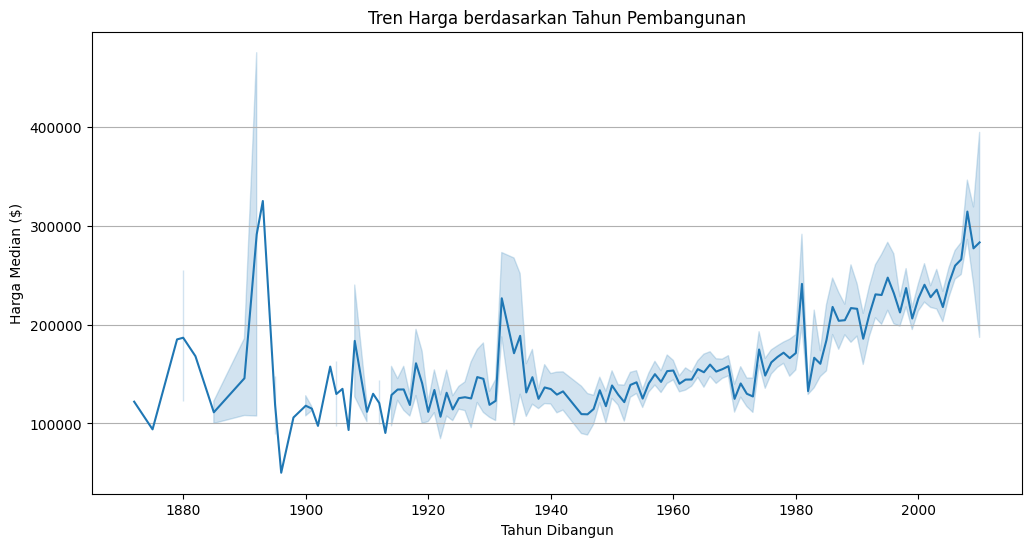

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year Built', y='SalePrice')
plt.title('Tren Harga berdasarkan Tahun Pembangunan')
plt.xlabel('Tahun Dibangun')
plt.ylabel('Harga Median ($)')
plt.grid(axis='y')
plt.show()

Linear regresi (supervised learning)

buat linear chart x(size of housing)  y(harga rumah)

In [20]:

data_object = data.select_dtypes(include=['object']).columns
data_object

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')